#*Creating a Random Forest Model to predict fraudulent insurance claims based on policy holder data.*

Data was obtained from kaggle with policy holders from the USA.

The features included:
 * INSURANCE_TYPE
 * PREMIUM_AMOUNT
 * CLAIM_AMOUNT
 * CITY
 * MARITAL_STATUS
 * AGE
 * TENURE 
 * EMPLOYMENT_STATUS
 * NO_OF_FAMILY_MEMBERS
 * RISK_SEGMENTATION
 * HOUSE_TYPE
 * SOCIAL_CLASS
 * CLAIM_STATUS
 * INCIDENT_SEVERITY
 * AUTHORITY_CONTACTED
 * ANY_INJURY
 * INCIDENT_HOUR_OF_THE_DAY


#Libraries used include:



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler


#Reading the csv file

In [ ]:
df = pd.read_csv("/content/insurance_data.csv", usecols=( 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CITY',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'INCIDENT_HOUR_OF_THE_DAY'))
df

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CITY,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,INCIDENT_HOUR_OF_THE_DAY
0,Health,157.13,9000,Glendale,Y,54,89,Y,3,L,Own,LI,A,Major Loss,Police,0,4
1,Property,141.71,26000,Arvada,N,61,80,Y,4,L,Rent,MI,A,Total Loss,Ambulance,1,0
2,Property,157.24,13000,Vallejo,N,47,68,Y,6,L,Rent,MI,A,Total Loss,Police,0,19
3,Health,172.87,16000,Thunderbolt,Y,36,16,Y,7,L,Mortgage,MI,A,Minor Loss,Ambulance,0,12
4,Travel,88.53,3000,Livermore,Y,51,16,Y,2,M,Rent,HI,A,Major Loss,Police,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Motor,105.75,1000,Manchester,N,45,98,Y,3,M,Own,MI,A,Minor Loss,Ambulance,1,0
9996,Life,64.59,67000,Fayetteville,Y,52,92,Y,3,L,Mortgage,LI,A,Total Loss,Police,1,6
9997,Health,183.50,8000,Anchorage,Y,53,32,Y,2,M,Mortgage,LI,A,Major Loss,None,1,12
9998,Motor,113.46,2000,Oakland,Y,61,44,Y,7,M,Rent,MI,A,Total Loss,Ambulance,0,6


#Encoding the data from word categories to numerical categories.

In [ ]:

df['SOCIAL_CLASS'] = df['SOCIAL_CLASS'].astype('category').cat.codes
df['INSURANCE_TYPE'] = df['INSURANCE_TYPE'].astype('category').cat.codes
df['CITY'] = df['CITY'].astype('category').cat.codes
df['RISK_SEGMENTATION'] = df['RISK_SEGMENTATION'].astype('category').cat.codes
df['HOUSE_TYPE'] = df['HOUSE_TYPE'].astype('category').cat.codes
df['INCIDENT_SEVERITY'] = df['INCIDENT_SEVERITY'].astype('category').cat.codes
df['AUTHORITY_CONTACTED'] = df['AUTHORITY_CONTACTED'].astype('category').cat.codes
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].astype('category').cat.codes
df['EMPLOYMENT_STATUS'] = df['EMPLOYMENT_STATUS'].astype('category').cat.codes
df['CLAIM_status'] = df['CLAIM_STATUS'].astype('category').cat.codes

In [ ]:
print(df['SOCIAL_CLASS'].unique())
print(df['CLAIM_status'].unique())

[1 2 0]
[0 1]


In [ ]:
df

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CITY,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,INCIDENT_HOUR_OF_THE_DAY,CLAIM_status
0,0,157.13,9000,127,1,54,89,1,3,1,1,1,A,0,3,0,4,0
1,4,141.71,26000,11,0,61,80,1,4,1,2,2,A,2,0,1,0,0
2,4,157.24,13000,367,0,47,68,1,6,1,2,2,A,2,3,0,19,0
3,0,172.87,16000,355,1,36,16,1,7,1,0,2,A,1,0,0,12,0
4,5,88.53,3000,180,1,51,16,1,2,2,2,0,A,0,3,0,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,105.75,1000,195,0,45,98,1,3,2,1,2,A,1,0,1,0,0
9996,1,64.59,67000,108,1,52,92,1,3,1,0,1,A,2,3,1,6,0
9997,0,183.50,8000,3,1,53,32,1,2,2,0,1,A,0,1,1,12,0
9998,3,113.46,2000,253,1,61,44,1,7,2,2,2,A,2,0,0,6,0


In [ ]:
df.corr()

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CITY,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,INCIDENT_HOUR_OF_THE_DAY,CLAIM_status
INSURANCE_TYPE,1.000000,-0.147704,-0.271240,0.003691,-0.021238,0.025841,0.008084,-0.008521,0.005207,-0.001767,0.006746,0.000232,0.013756,0.002591,-0.013450,-0.008609,0.006197
PREMIUM_AMOUNT,-0.147704,1.000000,0.109210,0.010852,0.007455,-0.011634,0.006190,0.011419,0.000005,-0.005581,0.019688,0.007966,0.005158,0.002627,0.002934,0.003341,0.002787
CLAIM_AMOUNT,-0.271240,0.109210,1.000000,-0.006729,0.003097,-0.001530,-0.001614,0.010604,0.002860,-0.003675,-0.012768,-0.001444,0.002651,0.024691,0.011707,-0.004010,0.002579
CITY,0.003691,0.010852,-0.006729,1.000000,0.012464,0.008113,0.008007,-0.009975,0.009361,-0.002799,0.025431,-0.007019,0.002699,0.001288,0.003787,-0.007836,-0.000531
MARITAL_STATUS,-0.021238,0.007455,0.003097,0.012464,1.000000,-0.005509,0.006122,-0.000915,0.009884,-0.016902,0.012752,0.000175,-0.012744,0.004836,0.005210,0.018402,-0.010592
AGE,0.025841,-0.011634,-0.001530,0.008113,-0.005509,1.000000,-0.004507,-0.002160,-0.001442,0.011075,0.011801,0.007797,0.007242,0.001583,0.013887,0.019089,-0.003792
TENURE,0.008084,0.006190,-0.001614,0.008007,0.006122,-0.004507,1.000000,0.001327,-0.007814,0.009556,-0.017814,-0.001196,-0.003989,0.004772,-0.003832,-0.001705,-0.006020
EMPLOYMENT_STATUS,-0.008521,0.011419,0.010604,-0.009975,-0.000915,-0.002160,0.001327,1.000000,-0.004896,-0.001861,-0.007412,-0.009317,0.007109,-0.003658,-0.010632,-0.002388,-0.007137
NO_OF_FAMILY_MEMBERS,0.005207,0.000005,0.002860,0.009361,0.009884,-0.001442,-0.007814,-0.004896,1.000000,-0.012059,0.005948,0.020016,-0.001259,0.023591,0.020829,0.009265,0.008906
RISK_SEGMENTATION,-0.001767,-0.005581,-0.003675,-0.002799,-0.016902,0.011075,0.009556,-0.001861,-0.012059,1.000000,-0.019132,0.015368,-0.015153,-0.008811,0.001538,0.005501,0.016665


In [ ]:
#removes this since its a duplicate
del df['CLAIM_STATUS']

#Visualizing the correlation pattern with a heat map

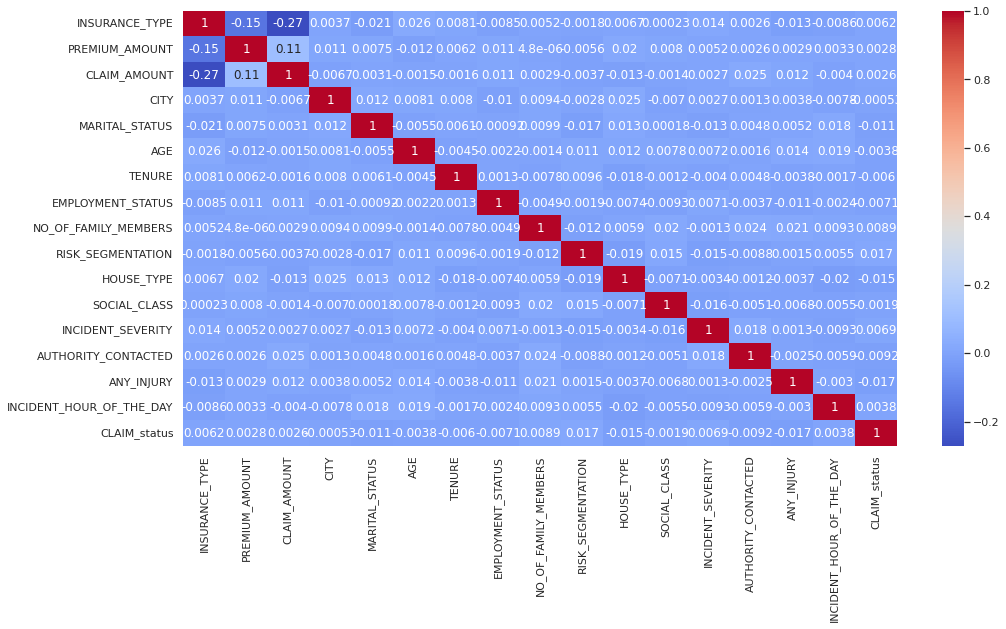

In [ ]:

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


Most of the features have a really low correlation with the target, so i'll just keep them all.

#Splitting data into features(X) and target(Y)

In [ ]:
X = df[df.columns[:-1]].values
Y = df[[df.columns[-1]]].values

In [ ]:
#confirming split

print(X.shape)
print(Y.shape)

(10000, 16)
(10000, 1)


#Visualizing the target.

(array([9497.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         503.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

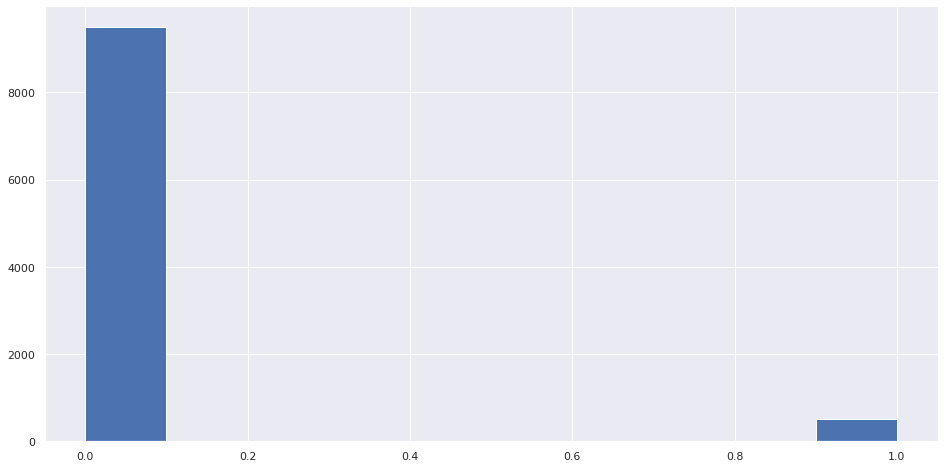

In [ ]:
plt.hist(Y)

#Using random sampling to ensure the samples are equal.

In [ ]:
sample = RandomOverSampler()
X,Y = sample.fit_resample(X,Y)

(array([9497.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9497.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

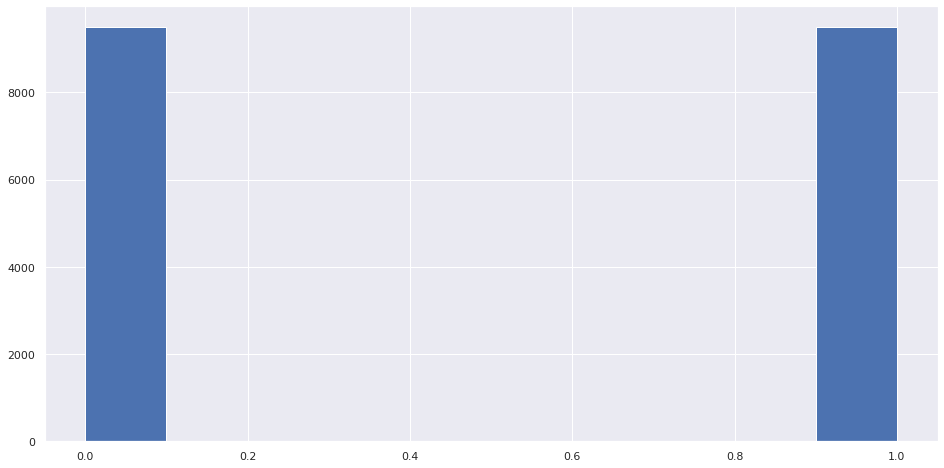

In [ ]:
plt.hist(Y)

#Splitting the data into train, validation and test sets.

In [ ]:
x_test, x_train_val, y_test, y_train_val = train_test_split(X, Y, random_state=0, test_size = .80)

#confirming split
print(x_test.shape)
print(x_train_val.shape)
print(y_test.shape)
print(y_train_val.shape)

(3798, 16)
(15196, 16)
(3798,)
(15196,)


In [ ]:
x_val, x_train, y_val, y_train = train_test_split(x_train_val, y_train_val, random_state=0, test_size = .75001)

#confirming split
print(x_val.shape)
print(x_train.shape)
print(y_val.shape)
print(y_train.shape)

(3798, 16)
(11398, 16)
(3798,)
(11398,)


#Instantiating the random forest regressor algorithm.

In [ ]:
rf = RandomForestRegressor(n_estimators = 80, max_features = 'sqrt', max_depth = 5, random_state = 20)

In [ ]:
#fitting the model in the training data
rf.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=80,
                      random_state=20)

#Making a prediction on the test data.

In [ ]:
y_pred = rf.predict(x_test)
print("Evaluated test_predictions:", y_pred)

Evaluated test_predictions: [0.51470649 0.59510828 0.50400846 ... 0.44485572 0.49838532 0.49633165]


# Evaluating the Algorithm.

In [ ]:

from sklearn import metrics  
print('Root Mean Squared Error with test data:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error with validation data:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error with test data: 0.48106572315618407
Root Mean Squared Error with validation data: 0.5021922235494316


The RMSE for your validation and your test sets should be very similar if you have built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.



RMSE of test > RMSE of train => OVER FITTING of the data.

RMSE of test < RMSE of train => UNDER FITTING of the data.